In [1]:
%matplotlib inline

import sys
import math
from copy import deepcopy

import geopandas as gpd
import numpy as np
from itertools import chain

sys.path.insert(0, "../")
from weavingspace.tile_unit import TileUnit
from weavingspace.weave_unit import WeaveUnit
from weavingspace.tile_map import Tiling
from weavingspace import tiling_utils
import shapely.geometry as geom
from shapely import line_interpolate_point
from shapely import equals
from shapely import equals_exact
import geopandas as gpd

n_sides=6 n_slices=6 offset=1


<Axes: >

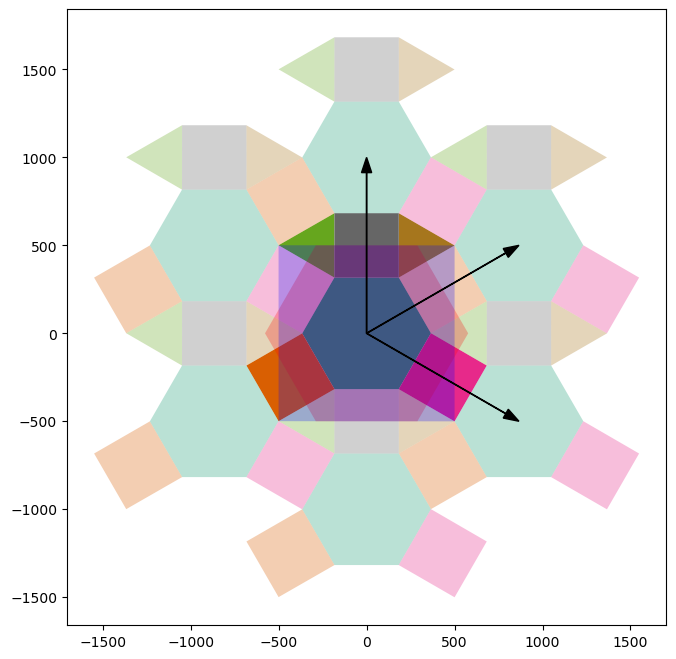

In [4]:
t = TileUnit(tiling_type = "archimedean", code = "3.4.6.4", n = 7, offset = 2/3)
# t.plot(r = 1, show_vectors = True, show_prototile = True, show_reg_prototile = False)
p1 = tiling_utils._get_prototile_1(t)
p2 = tiling_utils._get_prototile_2(t)
ax = t.plot(r = 1, show_vectors = True, show_ids = False, show_prototile = False, show_reg_prototile = False)
gpd.GeoSeries([p1, p2]).plot(ax = ax, fc = ["#ff000040", "#0000ff40"])

In [5]:
[p for p in p1.exterior.coords]

[(-288.6751346666667, -500.0),
 (-577.3502693333334, -1.680310434446199e-14),
 (-288.6751346666666, 500.0),
 (288.6751346666667, 500.0),
 (577.3502693333334, 1.680310434446199e-14),
 (288.6751346666666, -500.0),
 (-288.6751346666667, -500.0)]

In [6]:
# vecs = [geom.LineString([(0, 0), v]) for v in t.get_vectors()]
# starting_shape = tiling_utils.safe_union(t.tiles.geometry, as_polygon = True)
# corners = [geom.Point(p) for p in starting_shape.exterior.coords]
# corners = [p1 for p1, p2 in zip(corners[:-1], corners[1:])
#            if p1.distance(p2) > 1]
# angles = tiling_utils.get_interior_angles(geom.Polygon(corners))
# remove = [i for i, j in enumerate(angles) if j > 180]
# corners = [c for i, c in enumerate(corners) if not i in remove]

# ax = gpd.GeoSeries(geom.Polygon(corners)).plot()
# gpd.GeoSeries(corners).plot(ax = ax, color = "r")
# t.tiles.geometry.plot(ax = ax, fc = "#00000000", ec = 'w')
# gpd.GeoSeries(vecs).plot(ax = ax, color = 'k')

In [7]:
# def is_one_of_vectors(v):
#   return any([equals_exact(v, vec, 10) for vec in vecs])

# matches = []
# for i, ci in enumerate(corners):
#   for j, cj in enumerate(corners):
#     if j > i + 1:
#       v = geom.LineString([(0, 0), (cj.x - ci.x, cj.y - ci.y)])
#       if is_one_of_vectors(v):
#         matches.append((i, j))
# keepers = sorted(list(set([i for i in chain(*matches)])))
# poly = geom.Polygon([c for i, c in enumerate(corners) if i in keepers]).simplify(1)

# ax = t.plot(r = 1, show_prototile = True, show_reg_prototile = False, show_vectors = True)
# gpd.GeoSeries([poly]).plot(ax = ax, fc = "#ff000060")

# Scratch pad
A barebones notebook for testing basic operations of the package. The above code loads necessary libraries and allows for making a map.

In [8]:
# ak = gpd.read_file("data/imd-auckland-2018.gpkg")

In [9]:
# tile = TileUnit(tiling_type="square-colouring", 
#                 code="3.3.4.3.4", 
#                 spacing=500, 
#                 n=8, 
#                 crs=ak.crs) \
#                   .inset_prototile(10).inset_tiles(0)
# tile.plot(r=1)


In [10]:
# n = tile.tiles.shape[0]
# vars = dict(zip(list("abcdefghijkl")[:n], [x for x in ak.columns if "Rank" in x][:n]))
# cmaps = dict(zip(vars.values(), ["Reds", "Oranges", "Greens", "Blues", 
#                                  "Purples", "Greys", "YlOrBr", "PuRd", 
#                                  "YlOrRd", "BuGn", "BuPu", "YlGnBu" ][:n]))
# tiling = Tiling(tile, ak)
# map = tiling.get_tiled_map()
# fig = map.render(variables=vars, colourmaps=cmaps, use_ellipse=True)